# Problem set 3

Justin Barnes 

3/4/2024

## 1. Develop hypotheses about two non-linear relationships [1 pt]

You can use the GSS data, Student aid data, or your own data. Develop at least 2 hypotheses about non-linear relationships in your dataset of choice that do the following:

    A. Use the form: The DV will change positive/negatively if the IV changes positively/negatively/categorically (specify what the variables measure and what the categories are if you have a categorical hypothesis)
    
## H1: The percentage of the time that a respondent uses technology [usetech] will change positively as their education level [educ] changes positively. I will be treating the education variable as categorical and expect that there is a steeper increase in average tech use between respondents with less-than-high school [6-11 years] educational attainment and those with post-high school [12-15 years] educational attainment.

## H2: The percentage of time that a respondent uses technology [usetech] will increase at first with [age], then begin to decrease at around age 45-50

    B. State if you expect each hypothesized relationship will be linear or take one of the 5 non-linear forms (1. nominal, 2. sequential dummies, 3. splines, 4. quadratic, 5. logarithmic). You tell us at least two different non-linear forms that you think your hypothesized relationships will or will not take.
    
## H1: Sequential dummy non-linear

## H2: Quadratic non-linear 

    C. State your explanation why (theory) you make the predictions in A. and B.

## H1: I think that respondents with lesser educational attainment are likely to be more rural and unfamiliar with technology. I also think that respondents with higher educational attainment will be more likely to need to use tech for work/college. 

## H2: Similarly, I think that tech use will increase as respondents age due to requirements for work and/or school; however, it will begin to decrease both within individual lifetimes (finishing all schooling, retirement) and due to generational differences in tech use.

    D. Tell us the source of your data and describe its sample.

## My source is the 2018 GSS. This is a cross-sectional sample of panel data collected over time.

In [1]:
set more off 
use educ age usetech using GSS2018, clear
log using "Problem Set 3.log", replace

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  C:\Users\User\Documents\GRAD STATS LAB SEM 2\Soc211 Assignments\Pr
> oblem set 3\Problem Set 3.log
  log type:  text
 opened on:   4 Mar 2024, 14:30:28


In [2]:
ds

age      educ     usetech


## 2. Conduct statistical tests for your hypothesized relationship: [3 pts]

* Estimate at least 2 different types of non-linear models that test your hypotheses.

* Use appropriate regression and graphical representations to represent each model.

* Use esttab to compare between types of non-linear and linear models

# Categorical example

In [4]:
tab educ


       highest year of school |
                    completed |      Freq.     Percent        Cum.
------------------------------+-----------------------------------
          no formal schooling |          4        0.17        0.17
                            1 |          2        0.09        0.26
                            2 |          4        0.17        0.43
                            3 |         10        0.43        0.85
                            4 |          5        0.21        1.07
                            5 |          3        0.13        1.19
                            6 |         20        0.85        2.05
                            7 |          8        0.34        2.39
                            8 |         35        1.49        3.88
                            9 |         51        2.17        6.06
                           10 |         65        2.77        8.83
                           11 |         95        4.05       12.88
                           12

In [5]:
egen educat = cut(educ), at(1,6,12,16,20)
sum educat

(79 missing values generated)

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
      educat |      2,269    12.37726     3.21901          1         16


In [6]:
tab educat


     educat |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         24        1.06        1.06
          6 |        274       12.08       13.13
         12 |      1,280       56.41       69.55
         16 |        691       30.45      100.00
------------+-----------------------------------
      Total |      2,269      100.00


In [7]:
codebook usetech


-------------------------------------------------------------------------------
usetech                                             percentage of time use tech
-------------------------------------------------------------------------------

                  Type: Numeric (float)
                 Label: COUNTMISS, but 53 nonmissing values are not labeled

                 Range: [0,100]                       Units: .1
         Unique values: 53                        Missing .: 0/2,348
       Unique mv codes: 3                        Missing .*: 936/2,348

              Examples: 30    
                        85    
                        100   
                        .i    iap


In [8]:
reg usetech ib1.educat


      Source |       SS           df       MS      Number of obs   =     1,362
-------------+----------------------------------   F(3, 1358)      =     51.07
       Model |  199207.458         3  66402.4858   Prob > F        =    0.0000
    Residual |  1765777.24     1,358  1300.27779   R-squared       =    0.1014
-------------+----------------------------------   Adj R-squared   =    0.0994
       Total |  1964984.69     1,361  1443.78008   Root MSE        =    36.059

------------------------------------------------------------------------------
     usetech | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      educat |
          6  |   26.94048   10.89386     2.47   0.014     5.569859    48.31109
         12  |   46.68781    10.4925     4.45   0.000     26.10454    67.27107
         16  |   64.09439   10.54011     6.08   0.000     43.41772    84.77105
             |
       _cons |   4.1


Variables that uniquely identify margins: educat


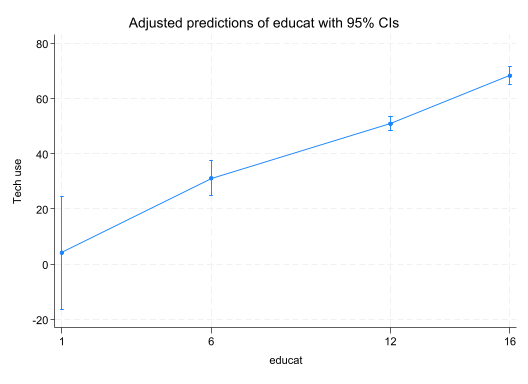

In [9]:
qui margins i.educat, atmeans
marginsplot, ytitle(Tech use)

In [10]:
eststo clear
qui eststo: reg usetech educat
qui eststo: reg usetech ib1.educat

In [11]:
esttab, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(3)) ///
se(fmt(3) par)) nobase


--------------------------------------------
                      (1)             (2)   
                  usetech         usetech   
                     b/se            b/se   
--------------------------------------------
educat              3.918***                
                  (0.318)                   
6.educat                           26.940*  
                                 (10.894)   
12.educat                          46.688***
                                 (10.492)   
16.educat                          64.094***
                                 (10.540)   
_cons               4.765           4.167   
                  (4.171)        (10.409)   
--------------------------------------------
R-Sqaured           0.100           0.101   
N                1362.000        1362.000   
--------------------------------------------


# Quadratic example

In [31]:
sum age 


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         age |      2,341    48.97138    18.06088         18         89


In [13]:
gen age2=age^2

(7 missing values generated)


In [14]:
%head age age2

,age,age2
1,,1849
2,,5476
3,,1764
4,,3969
5,,5041


In [15]:
eststo clear
eststo: reg usetech age 
predict yhat
eststo: reg usetech age age2
predict yhatquad



      Source |       SS           df       MS      Number of obs   =     1,406
-------------+----------------------------------   F(1, 1404)      =      6.94
       Model |  9873.33502         1  9873.33502   Prob > F        =    0.0085
    Residual |  1998745.09     1,404  1423.60761   R-squared       =    0.0049
-------------+----------------------------------   Adj R-squared   =    0.0042
       Total |  2008618.43     1,405  1429.62166   Root MSE        =    37.731

------------------------------------------------------------------------------
     usetech | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |  -.1864417   .0707956    -2.63   0.009    -.3253182   -.0475651
       _cons |    63.2671   3.253332    19.45   0.000     56.88518    69.64901
------------------------------------------------------------------------------
(est1 stored)
(option xb assumed; fitted values)
(

In [16]:
%set graph_width = 11

graph size was (5.5in, 4in), is now (11, 4in).


In [17]:
%set graph_width = 8 

graph size was (11, 4in), is now (8, 4in).


In [18]:
esttab, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(3)) ///
se(fmt(3) par)) nobase


--------------------------------------------
                      (1)             (2)   
                  usetech         usetech   
                     b/se            b/se   
--------------------------------------------
age                -0.186**         0.798   
                  (0.071)         (0.415)   
age2                               -0.011*  
                                  (0.004)   
_cons              63.267***       42.920***
                  (3.253)         (9.059)   
--------------------------------------------
R-Sqaured           0.005           0.009   
N                1406.000        1406.000   
--------------------------------------------


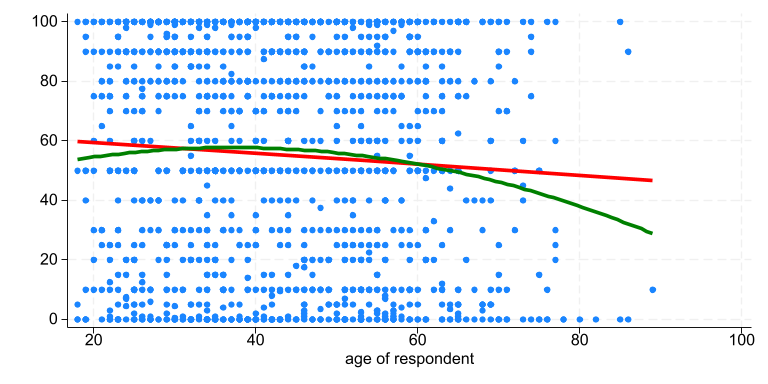

In [19]:
tw (scatter usetech age, sort) ///
(lfit usetech age, color(red) lwidth(thick)) ///
(qfit usetech age, color(green) lwidth(thick)), ///
legend(off) name(quadratic, replace)

## 3. Interpret the results [1 pt]

    A. Say whether the results support or contradict your hypothesis and why
    
## H1: My hypothesis is partially supported - as predicted, there is a positive association between education and tech use. When the IV [educ] is transformed into a categorical variable [educat] and tested with a sequential dummy non-linear model, there are some differences noted in tech use between all brackets. 
## - However, my prediction regarding the trends between brackets seems to be incorrect. The change in average tech use between less-than-high school and post-high school respondents doesn't seem to be more pronounced (steeper) than between other brackets. 

## H2: Both the linear and quadratic non-linear models seem to support my hypothesis that tech use decreases for older respondents. The non-linear model seems to provide a bit more support as tech use shows a gradual increase until around 40 years old, at which point it begins to decrease. Neither model shows a particularly pronounced decrease and the r-squared value seems to be poor for both, so support for my hypothesis is weak at best. 
    
    B. Say whether a linear or particular non-linear model best describes your data and why
    
## H1: As mentioned above, a non-linear sequential dummy highlights slight differences between brackets of educational attainment and has an extremely slight advantage in its r-squared value (.100 vs .101). Combining this with theory about work and school requirements, I think that a non-linear model is very slightly better at explaining the data. 

## H2: While both have very poor r-squared values, the quadratic model has a slightly stronger one at .009 (vs .005). The p-value for the quadratic model also seems to be a bit stronger at .016, though I am unclear as to why this model seems to take statistical significance away from the age variable (.055 in the second model). Overall, and in combination with theory, I think that the quadratic model best fits the data. Tech use does not steadily decline with age before a certain point. 

# EXTRA - Logarithmic example

### NOTE TO ANH: I wanted to try creating a logarithmic model, but not sure if I did it correctly and ran out of time for interpretation. Since the directions just ask for 2 non-linear models, can you please just grade the two above (and give feedback on this one if you feel like it)? Thanks :) 

In [20]:
/*Just trying a logarithmic model to see if I follow */
gen usetechln=log(usetech)

(1,112 missing values generated)


In [21]:
eststo clear
eststo: reg usetech age 
predict yhat2, xb 
eststo: reg usetechln age
predict yhatln, xb 


      Source |       SS           df       MS      Number of obs   =     1,406
-------------+----------------------------------   F(1, 1404)      =      6.94
       Model |  9873.33502         1  9873.33502   Prob > F        =    0.0085
    Residual |  1998745.09     1,404  1423.60761   R-squared       =    0.0049
-------------+----------------------------------   Adj R-squared   =    0.0042
       Total |  2008618.43     1,405  1429.62166   Root MSE        =    37.731

------------------------------------------------------------------------------
     usetech | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |  -.1864417   .0707956    -2.63   0.009    -.3253182   -.0475651
       _cons |    63.2671   3.253332    19.45   0.000     56.88518    69.64901
------------------------------------------------------------------------------
(est1 stored)
(7 missing values generated)

      

In [22]:
%head

,age,educ,usetech,educat,age2,yhat,yhatquad,usetechln,_est_est1,yhat2,_est_est2,yhatln
1,,,100,12,1849,55.2501,57.382,4.60517,1,55.2501,1,3.834965
2,,,.,6,5476,49.47041,43.17424,.,0,49.47041,0,3.693929
3,,,100,16,1764,55.43655,57.49669,4.60517,1,55.43655,1,3.839515
4,,,70,16,3969,51.52127,50.57817,4.248495,1,51.52127,1,3.743974
5,,,.,16,5041,50.02974,45.45121,.,0,50.02974,0,3.707578


In [23]:
replace yhatln=2.718^(yhatln)

(2,341 real changes made)


In [24]:
%head

,age,educ,usetech,educat,age2,yhat,yhatquad,usetechln,_est_est1,yhat2,_est_est2,yhatln
1,,,100,12,1849,55.2501,57.382,4.60517,1,55.2501,1,46.27343
2,,,.,6,5476,49.47041,43.17424,.,0,49.47041,0,40.18711
3,,,100,16,1764,55.43655,57.49669,4.60517,1,55.43655,1,46.48441
4,,,70,16,3969,51.52127,50.57817,4.248495,1,51.52127,1,42.24924
5,,,.,16,5041,50.02974,45.45121,.,0,50.02974,0,40.73931


In [25]:
esttab, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(3)) ///
se(fmt(3) par)) nobase


--------------------------------------------
                      (1)             (2)   
                  usetech       usetechln   
                     b/se            b/se   
--------------------------------------------
age                -0.186**        -0.005*  
                  (0.071)         (0.002)   
_cons              63.267***        4.031***
                  (3.253)         (0.094)   
--------------------------------------------
R-Sqaured           0.005           0.004   
N                1406.000        1231.000   
--------------------------------------------


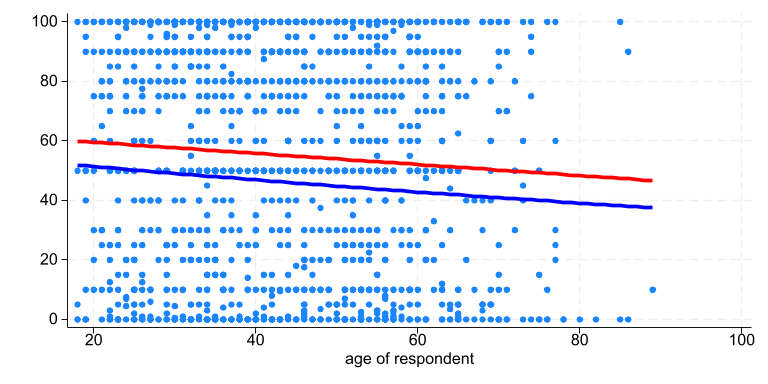

In [26]:
tw (scatter usetech age) ///
(line yhat2 age, sort color(red) lwidth(thick)) ///
(line yhatln age, sort color(blue) lwidth(thick)), legend(off)

/*Not clear why the log line isn't shaped like a logarithmic curve, so stuck at this point. */ 